# Практика № 9 «Статистические методы»

Задание 1

Три игрока (с номерами 1, 2 и 3), имеющие изначально X, Y и Z 
жетонов соответственно, играют в следующую игру. В каждом раунде каждый 
игрок ставит на кон один жетон. Затем бросают кубик, на котором цифры 4, 5, 
6 заменены на 1, 2 и 3. При выпадении числа i игрок с номером i забирает с 
кона все три жетона. Игра заканчивается, когда кто-нибудь из игроков 
проигрывает все жетоны. Введем функцию f(X, Y, Z), как среднюю 
длительность игры (среднее количество раундов) при заданных начальных 
капиталах X, Y, Z. Например, f(2, 2, 2) = 2. Ваша задача состоит в том, чтобы 
определить эту функцию. 

In [32]:
import random

def game(x,y,z):
    round=0
    while x>0 and y>0 and z>0:
        round+=1
        player = [x,y,z]
        for i in range(3):
            player[i]-=1
        winner=random.randint(1, 3)
        player[winner-1]+=3
        x,y,z=player[0],player[1],player[2]
    return round

def f(x,y,z):
    kolvo_roundov = 0
    kolvo_igr=10
    for i in range(kolvo_igr):
        kolvo_roundov+=game(x,y,z)
    sred_kol = kolvo_roundov / kolvo_igr
    return sred_kol

print("Начальные капитал для игрка 1")
x=int(input())

print("Начальные капитал для игрка 2")
y=int(input())

print("Начальные капитал для игрка 3")
z=int(input())


sred_kol = f(x,y,z)

print(f"Среднее количество раундов при {x}, {y}, {z} равно : {sred_kol}")
        
            

Начальные капитал для игрка 1
5
Начальные капитал для игрка 2
5
Начальные капитал для игрка 3
5
Среднее количество раундов при 5, 5, 5 равно : 11.3


Задание 2

Игрок A выбирает комбинацию из цифр 0 и 1 длиной 3 знака 
(например, 001). Игрок B выбирает свою комбинацию (отличную от игрока A). 
Подбрасывается монета и записываются результаты бросания (например, 
101101..., где 0 обозначает «орел», а 1 — «решка»). Игра прекращается в тот 
момент, когда в последовательности цифр на конце возникает комбинация, 
выбранная A или B (побеждает A или B соответственно). Игра повторяется.
а) Оценить шансы на выигрыш каждого из игроков R(A,B) (т.е. 
отношение числа выигрышей игрока B к числу выигрышей игрока A).
б) Для выбранной игроком A комбинации определить такую 
комбинацию для игрока B, которая ему дает больше шансов на выигрыш.
Ниже представлена таблица значений R(A,B) для всевозможных 
выбранных игроками A и B исходных комбинаций при «неограниченном 
продолжении» игры (выделены наиболее выигрышные ситуации для игрока 
B).
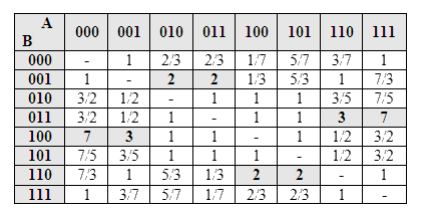

Пари является беспроигрышным (!) для игрока B. Парадокс заключается 
в том, что какую бы комбинацию цифр не выбрал игрок A, его соперник B 
может выбрать другую комбинацию, которая ему дает больше шансов на 
выигрыш


In [38]:
import random

def play_game(player_a, player_b):
    wins_a = 0
    wins_b = 0

    for i in range(1000):#Повторяем игру для оценки шансов
        coin_toss_results = ""
        while True:
            coin_toss_results += str(random.randint(0, 1))
            if coin_toss_results[-len(player_a):] == player_a:
                wins_a += 1
                break
            elif coin_toss_results[-len(player_b):] == player_b:
                wins_b += 1
                break

    return wins_b / wins_a  # Оценка шансов на выигрыш игрока B относительно игрока A

# а) Оценить шансы на выигрыш каждого из игроков R(A,B)
player_a_combinations = ["000", "001", "010", "011", "100", "101", "110", "111"]
player_b_combinations = ["000", "001", "010", "011", "100", "101", "110", "111"]

#player_b_combinations = ["111", "110", "101", "100", "011", "010", "001", "000"]

for i in range(len(player_a_combinations)):
    player_a = random.choice(player_a_combinations)
    player_b = random.choice(player_b_combinations)
    win_ratio = play_game(player_a, player_b)
    print(f"Шансы на выигрыш игрока B при комбинации {player_a} против комбинации {player_b}: {win_ratio}")

# б) Определить комбинацию для игрока B, которая дает больше шансов на выигрыш
best_win_ratio = 0
best_player_b = ""

for player_b in player_b_combinations:
    total_win_ratio = 0
    for player_a in player_a_combinations:
        total_win_ratio += play_game(player_a, player_b)
    average_win_ratio = total_win_ratio / len(player_a_combinations)
    if average_win_ratio > best_win_ratio:
        best_win_ratio = average_win_ratio
        best_player_b = player_b

print(f"Наиболее выигрышная комбинация для игрока B: {best_player_b}")

# в) Пари является беспроигрышным для игрока B
print("Пари является беспроигрышным для игрока B")

Шансы на выигрыш игрока B при комбинации 111 против комбинации 010: 1.304147465437788
Шансы на выигрыш игрока B при комбинации 111 против комбинации 111: 0.0
Шансы на выигрыш игрока B при комбинации 001 против комбинации 100: 2.7313432835820897
Шансы на выигрыш игрока B при комбинации 101 против комбинации 100: 0.9841269841269841
Шансы на выигрыш игрока B при комбинации 011 против комбинации 110: 0.349527665317139
Шансы на выигрыш игрока B при комбинации 000 против комбинации 111: 0.9193857965451055
Шансы на выигрыш игрока B при комбинации 010 против комбинации 000: 0.6583747927031509
Шансы на выигрыш игрока B при комбинации 111 против комбинации 100: 1.5125628140703518
Наиболее выигрышная комбинация для игрока B: 011
Пари является беспроигрышным для игрока B
